In [2]:
import numpy as np
import pandas as pd
from arch.unitroot import ADF
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from arch import arch_model
import matplotlib.pyplot as plt
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_arch
data = pd.read_excel('/Users/alexcappadona/Downloads/PorftolioIndexData.xlsx', index_col=0)
data.tail()

,DJIA,QQQ
Date,,
2020-03-11,23553.22,193.430893
2020-03-12,21200.62,175.694931
2020-03-13,23185.62,190.577286
2020-03-16,20188.52,167.748444
2020-03-17,21237.38,180.470000


In [3]:
# 2b: computing arithmetic returns for the indicies
data['DJIA_Return'] = (data['DJIA']-data['DJIA'].shift(1))/data['DJIA'].shift(1)
data['QQQ_Return'] = (data['QQQ']-data['QQQ'].shift(1))/data['QQQ'].shift(1)
data=data.dropna()
data.head()

,DJIA,QQQ,DJIA_Return,QQQ_Return
Date,,,,
2000-01-04,10997.93,76.538902,-0.031660,-0.068602
2000-01-05,11122.65,74.587456,0.011340,-0.025496
2000-01-06,11253.26,69.465050,0.011743,-0.068677
2000-01-07,11522.56,78.056686,0.023931,0.123683
2000-01-10,11572.20,80.224899,0.004308,0.027777


In [4]:
# 2b: client's portfolio return
data['PortReturn'] = (.5*data['DJIA_Return'])+(.5*data['QQQ_Return'])
data.head()

,DJIA,QQQ,DJIA_Return,QQQ_Return,PortReturn
Date,,,,,
2000-01-04,10997.93,76.538902,-0.031660,-0.068602,-0.050131
2000-01-05,11122.65,74.587456,0.011340,-0.025496,-0.007078
2000-01-06,11253.26,69.465050,0.011743,-0.068677,-0.028467
2000-01-07,11522.56,78.056686,0.023931,0.123683,0.073807
2000-01-10,11572.20,80.224899,0.004308,0.027777,0.016043


In [5]:
# og return of the portfolio
data['lnPortReturn'] = np.log(1+data['PortReturn'])*100
data.head()
# lnPortReturn is computed as a % (decimal return * 100)

,DJIA,QQQ,DJIA_Return,QQQ_Return,PortReturn,lnPortReturn
Date,,,,,,
2000-01-04,10997.93,76.538902,-0.031660,-0.068602,-0.050131,-5.143118
2000-01-05,11122.65,74.587456,0.011340,-0.025496,-0.007078,-0.710308
2000-01-06,11253.26,69.465050,0.011743,-0.068677,-0.028467,-2.887994
2000-01-07,11522.56,78.056686,0.023931,0.123683,0.073807,7.121014
2000-01-10,11572.20,80.224899,0.004308,0.027777,0.016043,1.591542


In [6]:
# 2b
data.describe()

,DJIA,QQQ,DJIA_Return,QQQ_Return,PortReturn,lnPortReturn
count,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000
mean,14180.579213,70.802288,0.000192,0.000307,0.000250,0.015561
std,5355.655584,48.715541,0.011711,0.017477,0.013707,1.371331
min,6547.050000,17.397966,-0.129265,-0.119788,-0.124527,-13.299057
25%,10425.082500,34.424785,-0.004559,-0.006438,-0.005338,-0.535232
50%,12156.790000,49.471565,0.000481,0.000962,0.000761,0.076069
75%,17141.372500,98.551839,0.005465,0.007725,0.006393,0.637285
max,29551.420000,234.808182,0.110803,0.168421,0.116226,10.995296


In [27]:
# 2c VaR
# W0 portfolio value
W0 = 1000000
np.quantile(data['lnPortReturn'], 0.01)/100*W0
# divided by 100 to account for the whole number percentage (lnPortReturn)

-38937.60682947424

In [8]:
# 2d regression

formula = 'lnPortReturn ~ 1'
results = smf.ols(formula, data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           lnPortReturn   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                nan
Time:                        17:52:30   Log-Likelihood:                -8815.3
No. Observations:                5082   AIC:                         1.763e+04
Df Residuals:                    5081   BIC:                         1.764e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0156      0.019      0.809      0.4

In [9]:
# 2d continued
# ARCH test

res = het_arch(results.resid,nlags=10) # resid is the variable we are analyzing
name = ['lm','lmpval','fval','fpval'] 
lzip(name,res)

[('lm', 1302.7124670070498),
 ('lmpval', 9.93839368540674e-274),
 ('fval', 174.91442979112753),
 ('fpval', 4.3953463e-317)]

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7527.203488214137
Iteration:      2,   Func. Count:     16,   Neg. LLF: 7517.45226645908
Iteration:      3,   Func. Count:     24,   Neg. LLF: 7505.695775769686
Iteration:      4,   Func. Count:     32,   Neg. LLF: 7501.063555520256
Iteration:      5,   Func. Count:     39,   Neg. LLF: 7496.667926393996
Iteration:      6,   Func. Count:     46,   Neg. LLF: 7490.597909692933
Iteration:      7,   Func. Count:     53,   Neg. LLF: 7486.958584394339
Iteration:      8,   Func. Count:     60,   Neg. LLF: 7485.28136019553
Iteration:      9,   Func. Count:     67,   Neg. LLF: 7483.5502436412535
Iteration:     10,   Func. Count:     73,   Neg. LLF: 7483.263043404587
Iteration:     11,   Func. Count:     79,   Neg. LLF: 7483.207191687005
Iteration:     12,   Func. Count:     85,   Neg. LLF: 7483.206063064132
Iteration:     13,   Func. Count:     91,   Neg. LLF: 7483.206050628339
Optimization terminated successfully.    (Exit mode 0)
          

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


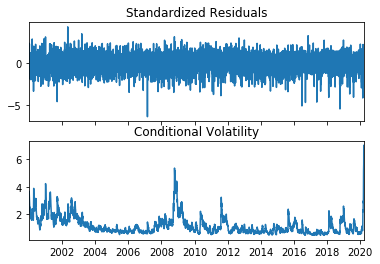

In [10]:
# 2e 
# GARCH (1,1) model


model = arch_model(data['lnPortReturn'], mean='constant', vol='GARCH', p=1, q=1)
model_fit = model.fit()
# Plot the results
model_fit.plot()
plt.show()

In [11]:
# the model parameters to be presented
print(model_fit)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:           lnPortReturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7483.21
Distribution:                  Normal   AIC:                           14974.4
Method:            Maximum Likelihood   BIC:                           15000.5
                                        No. Observations:                 5082
Date:                Thu, Dec 09 2021   Df Residuals:                     5081
Time:                        17:52:31   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0754  1.243e-02      6.071  1.268e-09 [5.

In [12]:
cv_forecast = model_fit.forecast(horizon=1) # 1 period forecast for March 18, 2020
print(cv_forecast.variance[-1:]**0.5) # print the forecast sigma

# ??how do I get forecast for time 0 (March 17, 2020)??

                 h.1
Date                
2020-03-17  6.863169


/opt/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


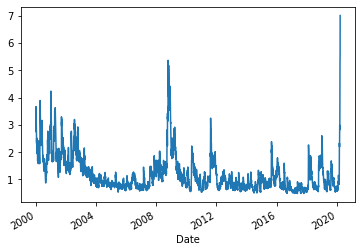

In [13]:

resid = model_fit.resid
cond_std = model_fit.conditional_volatility
cond_std.plot()
plt.show()
# estimated volatility over the period from Jan 1, 2000 to March 17, 2020:

In [23]:
st_residuals = pd.merge(resid, cond_std, how="inner", on="Date")
st_residuals.tail()

,resid,cond_vol
Date,,
2020-03-11,-5.315888,3.898407
2020-03-12,-10.144580,4.074791
2020-03-13,8.465922,5.171017
2020-03-16,-13.374500,5.640736
2020-03-17,6.118246,7.002230


In [15]:
st_residuals = st_residuals.resid/st_residuals.cond_vol

In [16]:
st_residuals.describe()

count    5082.000000
mean       -0.054359
std         0.998902
min        -6.421333
25%        -0.598757
50%         0.000658
75%         0.541517
max         4.358124
dtype: float64

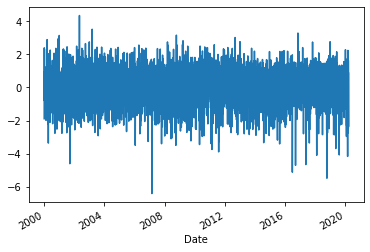

In [17]:
st_residuals.plot()
plt.show()

In [18]:
# 2f
# ARCH test on standardized residuals
# Null: no ARCH
res = het_arch(st_residuals,nlags=10)
name = ['lm','lmpval','fval','fpval'] 
lzip(name,res)

[('lm', 12.90365182755481),
 ('lmpval', 0.2291087641357376),
 ('fval', 1.2908507252060044),
 ('fpval', 0.2291881396856176)]

In [53]:
# 2g
# 99% VAR for March 18, 2020
za = np.quantile(st_residuals, 0.01)
ohat = 6.964844/100

In [56]:
# 2g answer
za*ohat*W0

-222509.323199075